#### <i> Understanding Social Media Behavior in the USA AI-Driven Insights for Predicting Digital Trends and User Engagement 25304 </i>
#### <i> Import Library Files </i>

In [1]:
# 📦 Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#### <i> Load The Dataset </i>

In [2]:
df = pd.read_csv("HybridDataset.csv")
df

,Unnamed: 0,what is your age group?,what is your occupation?,how many hours per day do you spend online?,what device do you use most to access the internet?,what is the total number of social media platforms that you use?,which social media platforms do you use regularly?,what is your most used social media platform?,could you spend an entire week without social media?,the first thing you do after walking up is scroll through your social media account.,what do you primarily use the internet for?,which activities do you engage in most on social media?,do you purchase premium subscriptions for social media platforms? (like spotify or netflix premium),how often do you find yourself distracted while working or studying due to social media?,do you use tools or apps to manage distractions?,what types of notifications or distractions affect you the most?,"have you ever paid to support a content creator? (e.g., membership, subscription)",do you feel like attention is being monetized by platforms?,category
0,0,18-24,Student,Less than 2,Smartphone,4 +,"Snapchat, Twitch, Spotify",YouTube,"Yes, ofcourse.",No,"Social Media, News","Shopping, Liking, Sharing and Commenting",No,Sometimes,No,"Social Media notifications, Suggested videos o...",No,No,Moderately Aware
1,1,18-24,Working Professional,Less than 2,Smartphone,3,"Facebook, Instagram, X, Spotify",YouTube,"Yes, ofcourse.",No,"News, Social Media, Gaming","Liking, Sharing and Commenting, Watching Video...",No,Sometimes,No,"Ads and Pop-ups, Messages (Text, Emails, Chats)",No,Yes,Highly Aware
2,2,18-24,Student,"""6-8""",Smartphone,4 +,"Facebook, Reddit, X, YouTube",YouTube,"No, it's too difficult.",No,"Studying/Work, News","Watching Videos, Shopping, Posting Content",No,Rarely,No,"Social Media notifications, Messages (Text, Em...",No,Yes,Moderately Aware
3,3,35-44,Student,Less than 2,Laptop/Computer,4 +,"Snapchat, YouTube",Instagram,"Yes, ofcourse.","Yes, even though I know that's a bad routine.","Gaming, News, Shopping","Posting Content, Shopping, Watching Videos",No,Often,Yes,"Ads and Pop-ups, Messages (Text, Emails, Chats)",No,No,Moderately Aware
4,4,25-34,Working Professional,"""2-4""",Smartphone,4 +,"X, Pinterest",Instagram,"No, it's too difficult.",No,"Entertainment, Social Media, Gaming","Watching Videos, Shopping, Posting Content",Yes,Rarely,Yes,"Social Media notifications, Trending posts or ...",No,Yes,Highly Aware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,105,18-24,Student,"""2-4""",Smartphone,4 +,"Instagram, X (Formerly Twitter), LinkedIn, Pin...",Instagram,"Yes, ofcourse.",No,"Entertainment, Social Media, Studying/Work, News","Watching Videos, Liking, Sharing and Commenting",No,Often,Yes,"Suggested videos or content, Trending posts or...",No,Yes,Highly Aware
306,106,18,Student,"""4-6""",Smartphone,4 +,"YouTube, Instagram, Spotify, X (Formerly Twitter)",Instagram,"Yes, ofcourse.","Yes, even though I know that's a bad routine.","Entertainment, Social Media, Studying/Work","Watching Videos, Liking, Sharing and Commenting",No,Often,No,Trending posts or updates,No,Yes,Moderately Aware
307,107,55+,Freelancer,More than 8,Laptop/Computer,4 +,"YouTube, X (Formerly Twitter), LinkedIn, Facebook",YouTube,"No, it's too difficult.",No,"Entertainment, Social Media, Studying/Work","Watching Videos, Liking, Sharing and Commenting",No,Often,Yes,Social Media notifications,Yes,Yes,Unaware
308,108,18-24,Student,"""4-6""",Smartphone,3,"YouTube, Instagram, Spotify, Snapchat",Instagram,"Yes, ofcourse.","Yes, even though I know that's a bad routine.","Entertainment, Shopping",Watching Videos,Yes,Sometimes,No,"Messages (Text, Emails, Chats)",No,Yes,Moderately Aware


#### <i> DataSet Overview </i>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 19 columns):
 #   Column                                                                                               Non-Null Count  Dtype 
---  ------                                                                                               --------------  ----- 
 0   Unnamed: 0                                                                                           310 non-null    int64 
 1   what is your age group?                                                                              310 non-null    object
 2   what is your occupation?                                                                             310 non-null    object
 3   how many hours per day do you spend online?                                                          310 non-null    object
 4   what device do you use most to access the internet?                                                  310 non-null   

In [4]:
df.describe()

,Unnamed: 0
count,310.000000
mean,83.532258
std,54.602630
min,0.000000
25%,38.250000
50%,77.000000
75%,121.750000
max,199.000000


#### <i> Expolatory Data Analysis And Visulizations </i>

In [5]:
# 🧹 Drop unnecessary columns
df.drop(columns=["Unnamed: 0"], inplace=True)

# 🔍 Preview dataset
print("Initial shape:", df.shape)
df.head()

# 🧼 Trim whitespace and lowercase all object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

# 🔢 Convert numeric-like columns
# Example: hours per day spent online, total number of platforms
# You'll need to check these manually if they have ranges or non-numeric answers

def extract_number(text):
    try:
        return int(text)
    except:
        try:
            # For ranges like '3-5', take average
            parts = text.replace('+', '').split('-')
            return np.mean([int(p) for p in parts])
        except:
            return np.nan

df["how many hours per day do you spend online?"] = df["how many hours per day do you spend online?"].apply(extract_number)
df["what is the total number of social media platforms that you use?"] = df["what is the total number of social media platforms that you use?"].apply(extract_number)

# 🧼 Clean "yes/no" style columns to binary
binary_map = {
    "yes": 1,
    "no": 0
}

binary_cols = [
    "could you spend an entire week without social media?",
    "do you purchase premium subscriptions for social media platforms? (like spotify or netflix premium)",
    "do you use tools or apps to manage distractions?",
    "have you ever paid to support a content creator? (e.g., membership, subscription)",
    "do you feel like attention is being monetized by platforms?"
]

for col in binary_cols:
    df[col] = df[col].map(binary_map)

# ℹ️ Print info after cleaning
print("\nAfter cleaning:")
print(df.info())

# 🧠 Encode categorical columns (optional - for modeling only)
encoded_df = pd.get_dummies(df, drop_first=True)

Initial shape: (310, 18)

After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 18 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   what is your age group?                                                                              310 non-null    object 
 1   what is your occupation?                                                                             310 non-null    object 
 2   how many hours per day do you spend online?                                                          0 non-null      float64
 3   what device do you use most to access the internet?                                                  310 non-null    object 
 4   what is the total number of social media platforms that you use?    

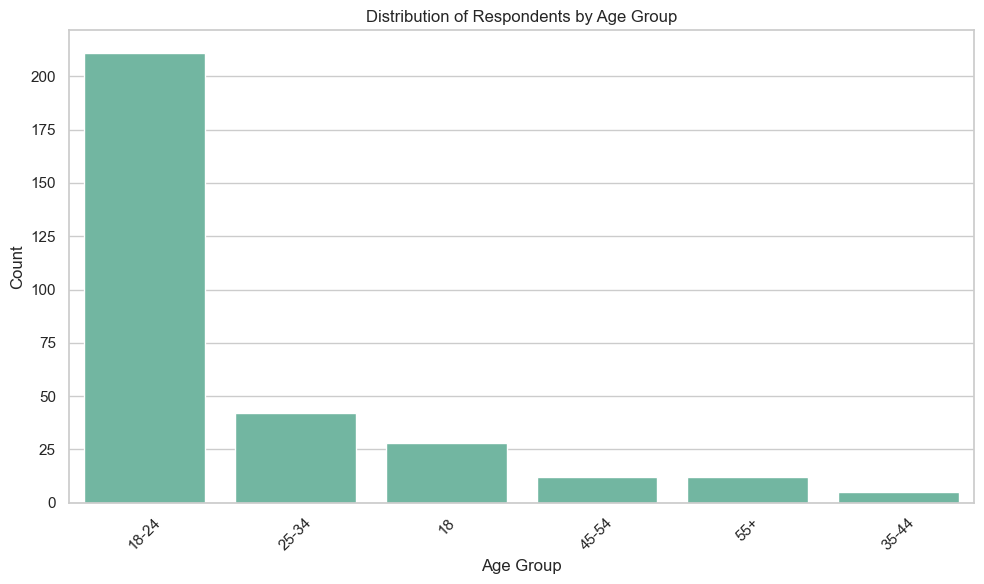

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Set style
sns.set(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (10, 6)

# ========== 1. AGE GROUP DISTRIBUTION ==========
sns.countplot(data=df, x="what is your age group?", order=df["what is your age group?"].value_counts().index)
plt.title("Distribution of Respondents by Age Group")
plt.xticks(rotation=45)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

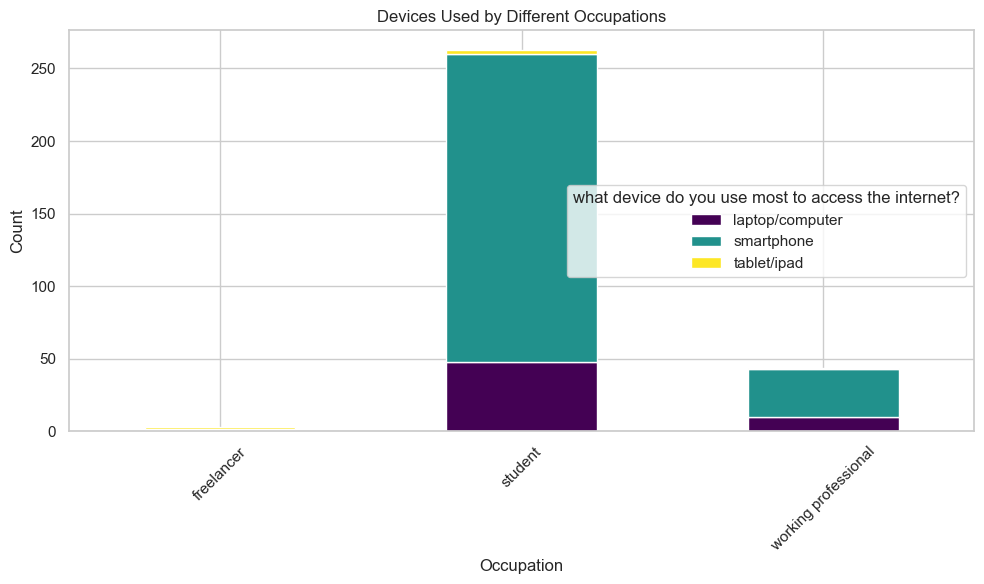

In [7]:
# ========== 2. OCCUPATION vs MOST USED DEVICE ==========
device_occupation = pd.crosstab(df["what is your occupation?"], df["what device do you use most to access the internet?"])
device_occupation.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Devices Used by Different Occupations")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

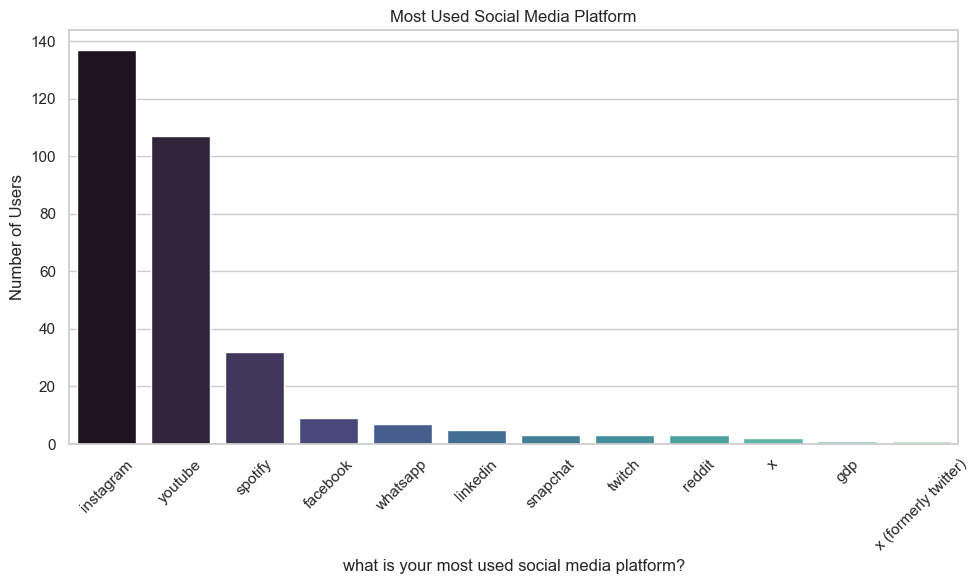

In [8]:
# ========== 4. MOST USED SOCIAL MEDIA PLATFORM ==========
platform_counts = df["what is your most used social media platform?"].value_counts()
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="mako")
plt.title("Most Used Social Media Platform")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

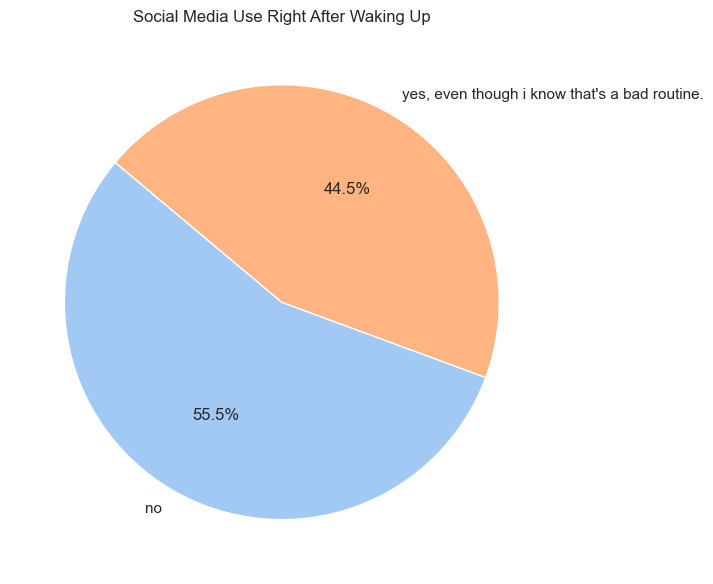

In [9]:
# ========== 5. SOCIAL MEDIA USE AFTER WAKING UP ==========
wakeup_sm = df["the first thing you do after walking up is scroll through your social media account."].value_counts()
plt.pie(wakeup_sm, labels=wakeup_sm.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Social Media Use Right After Waking Up")
plt.tight_layout()
plt.show()

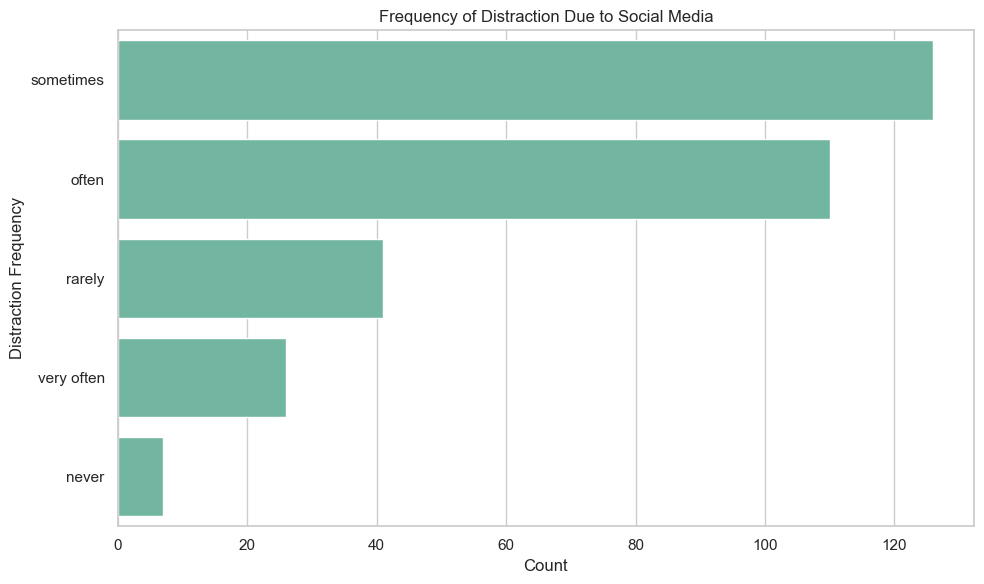

In [10]:
# ========== 6. DISTRACTION LEVEL DUE TO SOCIAL MEDIA ==========
sns.countplot(data=df, y="how often do you find yourself distracted while working or studying due to social media?", order=df["how often do you find yourself distracted while working or studying due to social media?"].value_counts().index)
plt.title("Frequency of Distraction Due to Social Media")
plt.xlabel("Count")
plt.ylabel("Distraction Frequency")
plt.tight_layout()
plt.show()

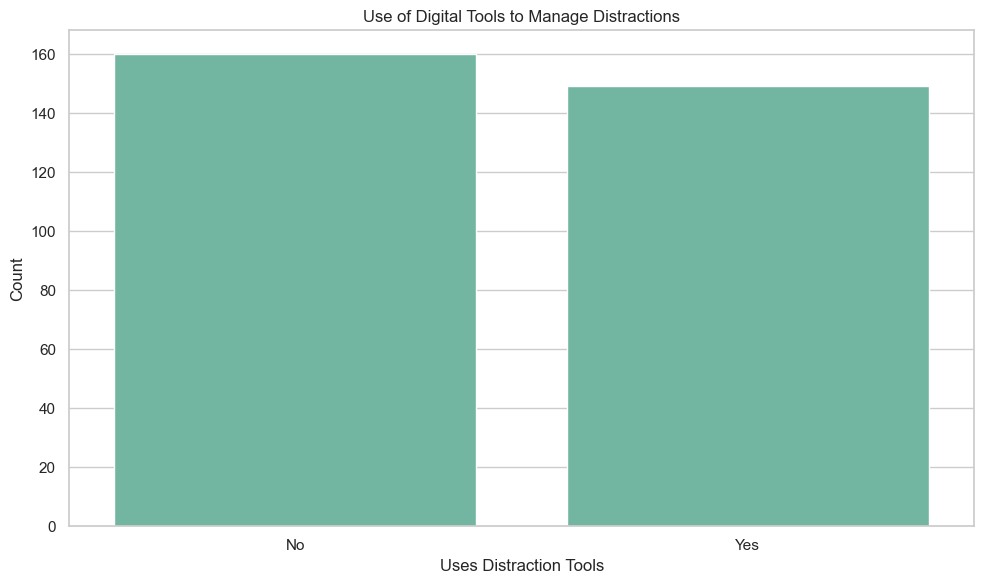

In [11]:
# ========== 7. USE OF TOOLS TO MANAGE DISTRACTIONS ==========
sns.countplot(data=df, x="do you use tools or apps to manage distractions?")
plt.title("Use of Digital Tools to Manage Distractions")
plt.xlabel("Uses Distraction Tools")
plt.ylabel("Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

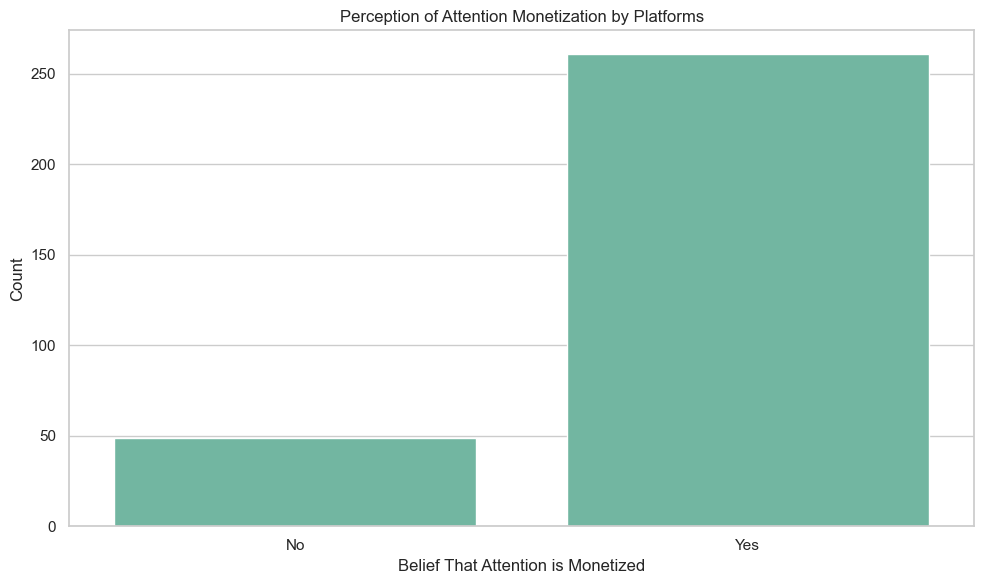

In [12]:
# ========== 8. PERCEPTION OF MONETIZATION OF ATTENTION ==========
sns.countplot(data=df, x="do you feel like attention is being monetized by platforms?")
plt.title("Perception of Attention Monetization by Platforms")
plt.xlabel("Belief That Attention is Monetized")
plt.ylabel("Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

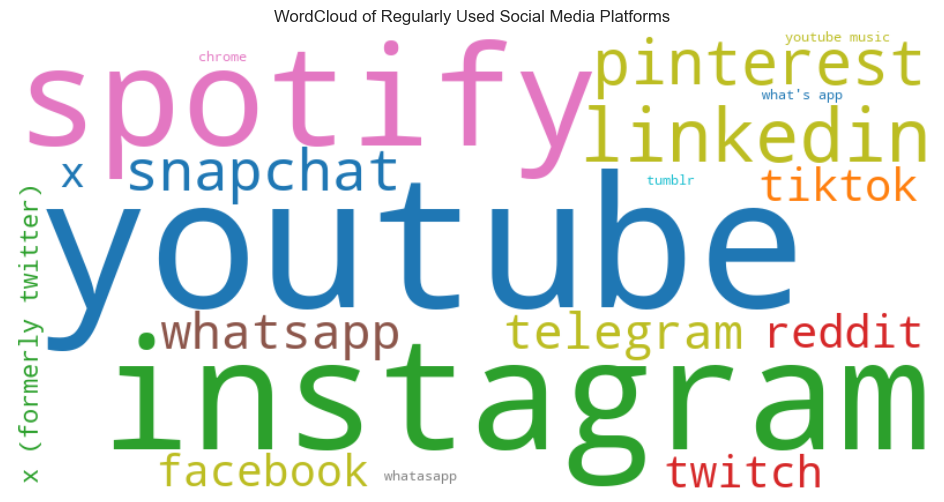

In [13]:
!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter

# ========== 1. WordCloud: Most Used Social Media Platforms (from multiple selections) ==========
# Splitting multichoice responses (comma-separated)
platforms_raw = df["which social media platforms do you use regularly?"].dropna()
platform_list = [p.strip() for sublist in platforms_raw.str.split(',') for p in sublist]
platform_freq = Counter(platform_list)

# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate_from_frequencies(platform_freq)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Regularly Used Social Media Platforms")
plt.show()


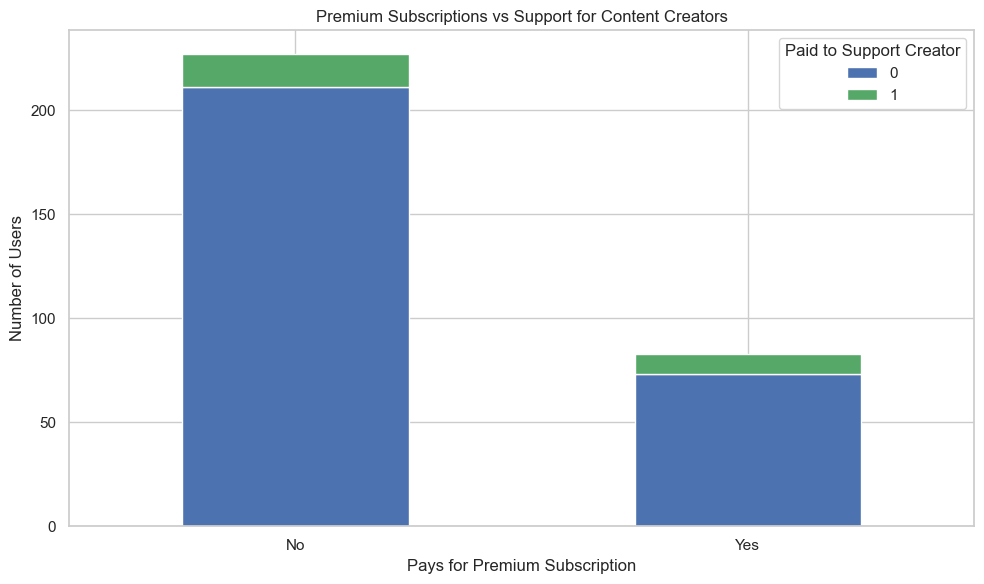

In [14]:
# ========== 3. Premium Subscription vs Support to Creators ==========
premium_creator_ct = pd.crosstab(df["do you purchase premium subscriptions for social media platforms? (like spotify or netflix premium)"],
                                 df["have you ever paid to support a content creator? (e.g., membership, subscription)"])

premium_creator_ct.plot(kind='bar', stacked=True, color=['#4c72b0', '#55a868'])
plt.title("Premium Subscriptions vs Support for Content Creators")
plt.xlabel("Pays for Premium Subscription")
plt.ylabel("Number of Users")
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.legend(title="Paid to Support Creator", loc='upper right')
plt.tight_layout()
plt.show()

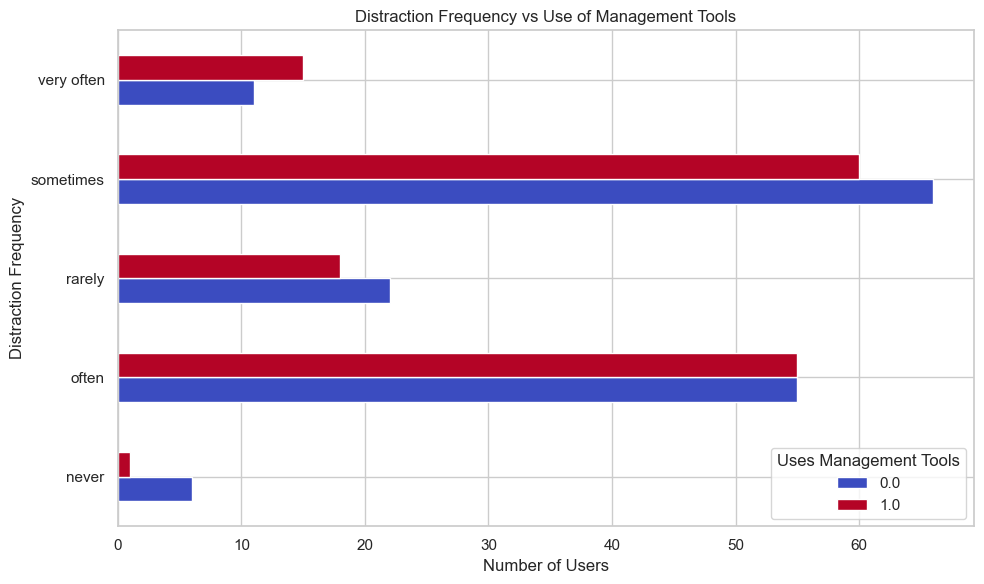

In [15]:
# ========== 4. Distractions vs Use of Management Tools ==========
tool_distraction_ct = pd.crosstab(df["how often do you find yourself distracted while working or studying due to social media?"],
                                  df["do you use tools or apps to manage distractions?"])

tool_distraction_ct.plot(kind='barh', colormap='coolwarm')
plt.title("Distraction Frequency vs Use of Management Tools")
plt.xlabel("Number of Users")
plt.ylabel("Distraction Frequency")
plt.legend(title="Uses Management Tools", loc='lower right')
plt.tight_layout()
plt.show()

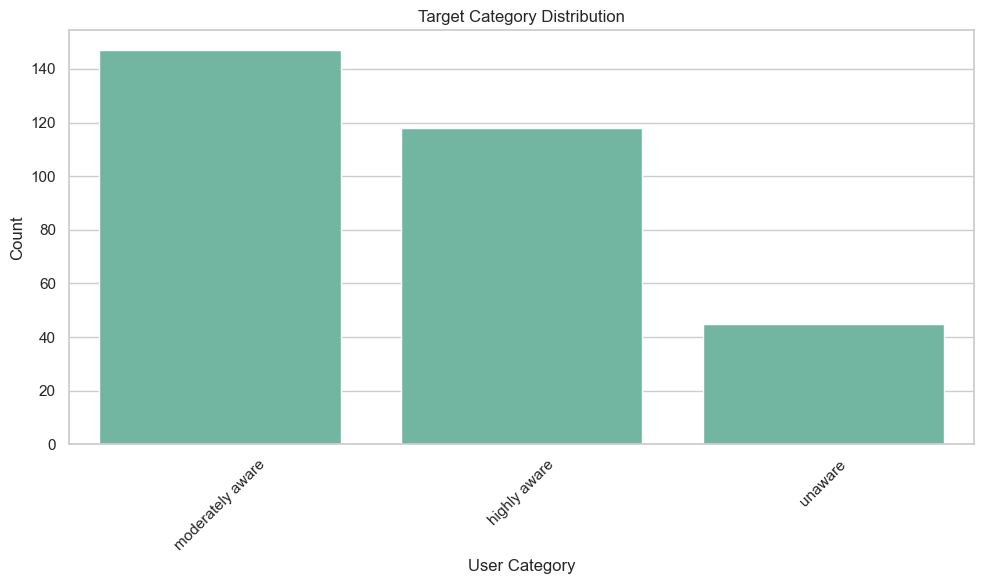

In [16]:
# ========== 5. Category Distribution ==========
sns.countplot(data=df, x="category", order=df["category"].value_counts().index)
plt.title("Target Category Distribution")
plt.xlabel("User Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### <i> Data Preprocessing </i>

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Copy of df to avoid overwriting original
df_model = df.copy()

# Encode target variable
le = LabelEncoder()
df_model["category_encoded"] = le.fit_transform(df_model["category"])

# Features (excluding original and encoded 'category')
X = df_model.drop(columns=[ "category", "category_encoded"])
y = df_model["category_encoded"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# List of categorical columns
categorical_cols = X.columns.tolist()

# One-hot encoding pipeline
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)]
)


#### <i> Modeling </i>
#### <i> Logistic Regression </i>

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression pipeline
log_reg_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial'))
])

# Hyperparameters to tune
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['lbfgs', 'saga']
}

# GridSearch
grid_lr = GridSearchCV(log_reg_pipeline, param_grid_lr, cv=5, n_jobs=-1)
grid_lr.fit(X_train, y_train)

# Best model prediction
y_pred_lr = grid_lr.predict(X_test)

print("🔹 Best Logistic Regression Params:", grid_lr.best_params_)
print(f"🔹 Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))


🔹 Best Logistic Regression Params: {'classifier__C': 0.1, 'classifier__solver': 'saga'}
🔹 Accuracy: 0.4032

🔹 Classification Report:
                   precision    recall  f1-score   support

    highly aware       0.38      0.42      0.40        24
moderately aware       0.41      0.45      0.43        29
         unaware       0.50      0.22      0.31         9

        accuracy                           0.40        62
       macro avg       0.43      0.36      0.38        62
    weighted avg       0.41      0.40      0.40        62



#### <i> Random Forest Classifier </i>

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Pipeline
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Parameter grid
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# GridSearch
grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Predict
y_pred_rf = grid_rf.predict(X_test)

print("🌲 Best Random Forest Params:", grid_rf.best_params_)
print(f"🌲 Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\n🌲 Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))


🌲 Best Random Forest Params: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
🌲 Accuracy: 0.4516

🌲 Classification Report:
                   precision    recall  f1-score   support

    highly aware       0.43      0.42      0.43        24
moderately aware       0.44      0.55      0.49        29
         unaware       0.67      0.22      0.33         9

        accuracy                           0.45        62
       macro avg       0.52      0.40      0.42        62
    weighted avg       0.47      0.45      0.44        62



#### <i> XGB Classifier </i>

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Pipeline
xgb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Parameter distribution
param_dist_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

# RandomizedSearch
random_xgb = RandomizedSearchCV(xgb_pipeline, param_distributions=param_dist_xgb, 
                                 n_iter=20, cv=5, random_state=42, n_jobs=-1)
random_xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = random_xgb.predict(X_test)

print("⚡ Best XGBoost Params:", random_xgb.best_params_)
print(f"⚡ Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\n⚡ Classification Report:\n", classification_report(y_test, y_pred_xgb, target_names=le.classes_))


⚡ Best XGBoost Params: {'classifier__subsample': 0.8, 'classifier__n_estimators': 200, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.01, 'classifier__colsample_bytree': 1.0}
⚡ Accuracy: 0.4355

⚡ Classification Report:
                   precision    recall  f1-score   support

    highly aware       0.45      0.54      0.49        24
moderately aware       0.43      0.31      0.36        29
         unaware       0.42      0.56      0.48         9

        accuracy                           0.44        62
       macro avg       0.43      0.47      0.44        62
    weighted avg       0.43      0.44      0.43        62



#### <i> Comparison Of All Models  </i>

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Accuracy scores
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

# Display the comparison
for model, acc in accuracy_scores.items():
    print(f"{model}: Accuracy = {acc:.4f}")


Logistic Regression: Accuracy = 0.4032
Random Forest: Accuracy = 0.4516
XGBoost: Accuracy = 0.4355


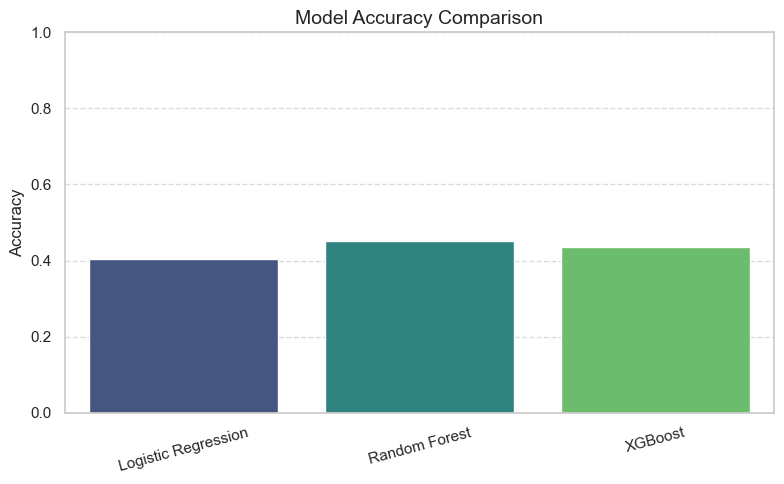

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
